# Bonus # 2: Training neural networks with backpropagation using Gradient Descent with Momentum
@Author: Juan Andrés Méndez Galvis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# What is gradiant descent?
Gradient Descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (f) that minimizes a cost function (cost). In other words, it is a method to find the minimum of a function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient.


## How does gradient descent work?

Gradient Descent works by iteratively updating the values of the parameters (coefficients) of a function (f) in the opposite direction of the gradient of the cost function (cost) with respect to the parameters. The gradient of the cost function is most of the time calculated using the first derivative of the cost function with respect to the parameters. Although the are some cases for example where the gradient is calculated using methdos such as backpropagation In the case of neural networks.

### But how does this happen? (MSE Cost Function)

![MSE Cost Function](assets/MSE_cost_f.png)

> note: For gradient descent the cost function can be any function, but for this example we will use the Mean Squared Error (MSE) cost function.

For this we plot a 3d plot between the coefficients, slope $m$ and intercept $b$ and the cost function $MSE(cost)$. Since the gradient descent is an iterative process, we start at a random point in the 3d plot and calculate the gradient of the cost function with respect to the parameters. Then we update the parameters in the opposite direction of the gradient. This process is repeated until the gradient is close to zero or the cost function is minimized.

## MSE(cost)

The cost function used in this example is the Mean Squared Error (MSE) cost function. The MSE cost function is used to measure the difference between the predicted values and the actual values. The MSE cost function is defined as:

$$MSE(cost) = \frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}$$

Where:
- $n$ is the number of observations
- $y_{i}$ is the actual value
- $\hat{y}_{i}$ is the predicted value

# The gradient descent algorithm

Now that we know how gradient descent works, let's see the algorithm in a more formal way:

---

***Algorithm: Gradient Descent***

---

1. Initialize:
    - $\alpha$: Learning rate
    - Random values for the $b$ and $m$ coefficients
2. **while** t < max_iterations:
    - t <- t + 1
    - m_t <- m_t - $\alpha$ * $\frac{\partial}{\partial m}MSE(cost)$
    - b_t <- b_t - $\alpha$ * $\frac{\partial}{\partial b}MSE(cost)$
3. **end while**






## Python Implementation

For this implementation, we will use the following libraries:
- `symPy`: To calculate the gradient of the cost function
- `numpy`: To handle the data

For this example, we will create a cost function $(x - 2)^{2} + (y - 3)^{2}$ and calculate the gradient of the cost function with respect to the parameters $x$ and $y$.

In [2]:
x, y = sp.symbols('x y')

cost = (x - 2)**2 + (y - 3)**2
cost

(x - 2)**2 + (y - 3)**2

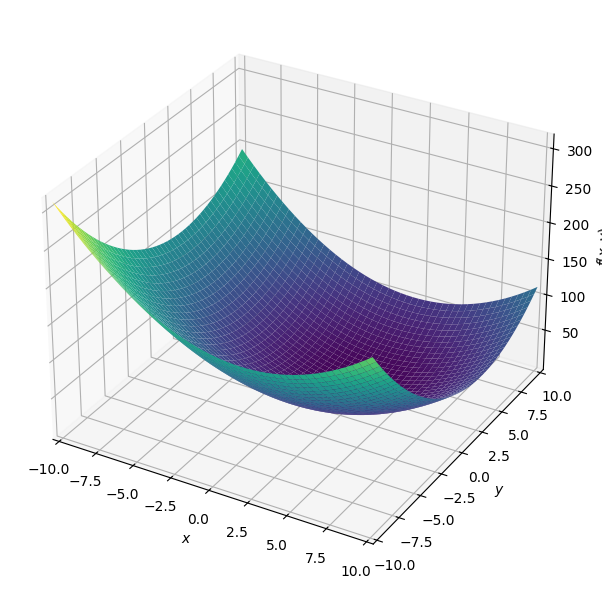

In [3]:
sp.plotting.plot3d(cost, (x, -10, 10), (y, -10, 10), size=(8, 6))

In [4]:
def compute_cosst(costfxn, x0, y0):
    return round(costfxn.subs({x: x0, y: y0}), 2)

In [5]:
def compute_gradient(costfxn, x0, y0):
    grad_x = sp.diff(costfxn, x).subs({x: x0, y: y0})
    grad_y = sp.diff(costfxn, y).subs({x: x0, y: y0})
    return grad_x, grad_y

In [6]:
def gradient_descent(costfxn, num_iters, learning_rate):
    # Intialize the x0 and y0 randomly
    x0 = np.random.randint(-10, 10)
    y0 = np.random.randint(-10, 10)
    print(f"Initial x0: {x0}, y0: {y0}")
    # Compute the cost
    costs = []
    costs.append(compute_cosst(costfxn, x0, y0))
    print(f"Initial cost: {costs[0]}")
    gradient_coords = []
    gradient_coords.append((x0, y0))

    # Perform gradient descent
    for i in range(num_iters):
        grad_x, grad_y = compute_gradient(costfxn, x0, y0)
        x0 = x0 - learning_rate * grad_x
        y0 = y0 - learning_rate * grad_y
        costs.append(compute_cosst(costfxn, x0, y0))
        gradient_coords.append((x0, y0))

    return x0, y0, costs, gradient_coords

Initial x0: 7, y0: 9
Initial cost: 61
Optimal x: 2.00000000000000, y: 3.00000000000000


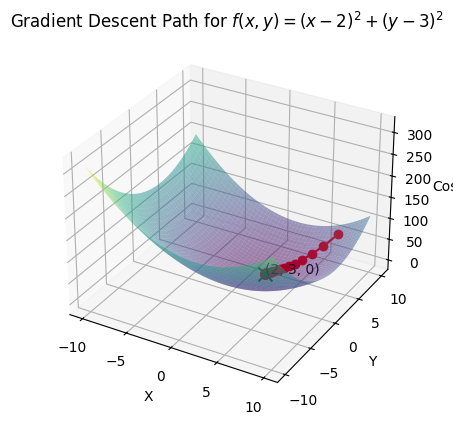

In [7]:
x_opt, y_opt, costs, gradient_coords = gradient_descent(cost, 100, 0.1)


x_opt = round(x_opt, 2)
y_opt = round(y_opt, 2)

print(f"Optimal x: {x_opt}, y: {y_opt}")

ax = plt.figure().add_subplot(projection='3d')
x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_vals, y_vals)

Z = (X - 2)**2 + (Y - 3)**2
ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis')
ax.plot([x[0] for x in gradient_coords], [y[1] for y in gradient_coords], costs, color='r', marker='o')
ax.scatter(x_opt, y_opt, compute_cosst(cost, x_opt, y_opt), color='g', marker='x', s=100)

ax.text(x_opt, y_opt, compute_cosst(cost, x_opt, y_opt), f"({int(round(x_opt, 0))}, {int(round(y_opt, 0))}, {int(round(compute_cosst(cost, x_opt, y_opt), 0))})")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Cost')
plt.title("Gradient Descent Path for $f(x, y) = (x - 2)^2 + (y - 3)^2$")
plt.show()


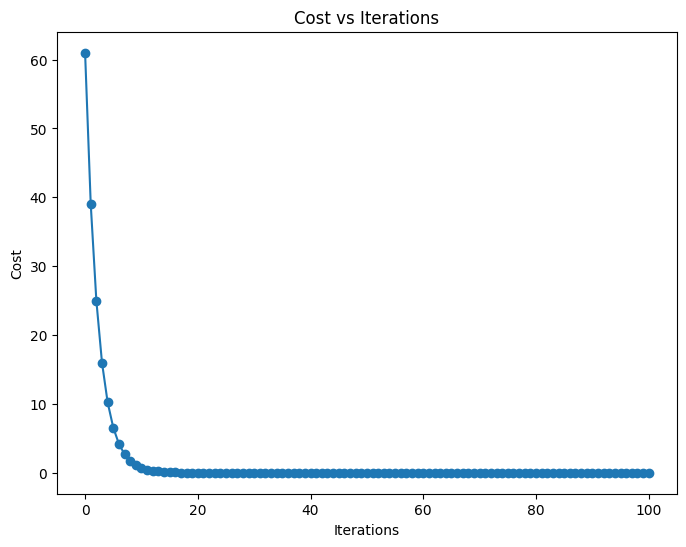

In [8]:
# plot the cost function

plt.figure(figsize=(8, 6))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(costs, linestyle='-', marker='o')
plt.title('Cost vs Iterations')
plt.show()

# Gradient Descent and Neural Networks

Now that we know how gradient descent works and how to implement it in Python, let's see how gradient descent is used to train neural networks using backpropagation.

## What is a neural network?

![Neural Network](assets/NN_fundamentals.png)

A neural network is a computational model inspired by the human brain. It is composed of layers of neurons that are connected by synapses. Each neuron receives input signals, processes them, and produces an output signal. The output signal is then passed to the next layer of neurons. The neural network is trained by adjusting the weights of the synapses to minimize the error between the predicted output and the actual output.

A neural network is composed of the following layers:
- Input layer: The input layer receives the input signals.
- Hidden layers: The hidden layers process the input signals and produce output signals.
- Output layer: The output layer produces the final output signal.

## How does the output of a neural network is calculated?

The neural network consists of the following:
- $\theta$: Weights of the synapses
- $b$: Bias
- $a$: Activation function
- $z$: Weighted sum of the inputs

The output of a neural network is calculated as follows:

$$z = \theta \cdot x + b$$
$$a = \sigma(z)$$

Where:
- $\sigma$: Activation function
- $x$: Input signal

The activation function is a non-linear function that introduces non-linearity into the neural network. The activation function is used to introduce non-linearity into the neural network, allowing it to learn complex patterns in the data.

The most common activation functions are:
- Sigmoid: $\sigma(z) = \frac{1}{1 + e^{-z}}$
- Tanh: $\sigma(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}$
- ReLU: $\sigma(z) = max(0, z)$



## How does a neural network learn and how it relates to gradient descent?

The neural network learns by adjusting the weights of the synapses to minimize the error between the predicted output and the actual output. The error is calculated using a cost function, such as the Mean Squared Error (MSE) cost function. The algorithm uses gradient descent to update the weights of the synapses in the opposite direction of the gradient of the cost function with respect to the weights.

### But how we calculate the gradient of the cost function with respect to the weights?

We use the **backpropagation algorithm** to calculate the gradient of the cost function with respect to the weights. The backpropagation algorithm is an algorithm that calculates the gradient of the cost function with respect to the weights of the synapses. The backpropagation algorithm works by propagating the error backwards through the neural network and calculating the gradient of the cost function with respect to the weights of the synapses.

## Neural Network Training Algorithm

Now that we know how a neural network learns and how it relates to gradient descent, let's see the algorithm to train a neural network using backpropagation with gradient descent:

---

**Neural Network Training Algorithm:**

---

1. **Initialize:**
   - Define the learning rate $\alpha$.
   - Initialize the weights $w$ and biases $b$ of the network with random values.
   
2. **Training Loop:**
   - **Repeat** until convergence or until a predefined number of iterations (max_iterations) is reached:
     - **Increment iteration counter**:
        - $t \leftarrow t + 1$

     - **Forward Pass**:
        - For each layer of the network, compute the output $o_i$ of each neuron using the activation function $f$:
          - $o_i = f\left(\sum_{j=1}^{n} w_{ij} x_j + b_i\right)$
        - Propagate the outputs forward through the network layers to compute the final output.

     - **Calculate Loss**:
        - Compute the loss (cost) function $L$ which measures the difference between the predicted output and the actual target values.

     - **Backpropagation**:
        - Calculate the gradient of the loss function with respect to each weight and bias using the chain rule.
        - For weights: $\nabla w = \text{backpropagation}(L, w)$
        - For biases: $\nabla b = \text{backpropagation}(L, b)$

     - **Gradient Descent Update**:
        - Update the weights and biases in the direction that minimally reduces the loss:
          - For each weight: $w \leftarrow w - \alpha \nabla w$
          - For each bias: $b \leftarrow b - \alpha \nabla b$

3. **End Training Loop**

4. **Output the final model parameters**:
   - Return the optimized weights and biases.

### Optimizing the training process

In practice, the algorithm for traning a neural network is more complex and involves additional techniques to improve the training process. Some of these techniques include:
- **Mini-batch processing**: Instead of updating the weights after processing the entire dataset, the weights are updated after processing a mini-batch of data.
- **Discounted learning rate**: The learning rate is decreased over time to prevent overshooting the minimum.
- **Weight initialization**: The weights are initialized using techniques such as Xavier, He, or Glorot initialization.

### Optimizing gradient descent

Gradient descent alone can be slow to converge, especially in high-dimensional spaces. To address this issue, several variants of gradient descent have been developed. One such variant is **Gradient Descent with Momentum**.

# Gradient Descent with Momentum

Gradient Descent with Momentum is an optimization algorithm that accelerates the convergence of gradient descent by adding a momentum term to the update rule. The momentum term helps to smooth out the oscillations in the gradient descent process and accelerates convergence by allowing the algorithm to build up speed in directions with consistent gradients.

![Gradient Descent with Momentum](assets/Gradiant_Descent_Momentum.png)

The update rule for Gradient Descent with Momentum is as follows:

$$v_t = \beta v_{t-1} + (\alpha) \nabla J(\theta)$$
$$\theta = \theta - \alpha v_t$$

Where:
- $\theta$: Model parameters (weights and biases)
- $\alpha$: Learning rate
- $\beta$: Momentum parameter
- $v_t$: Momentum term
- $\nabla J(\theta)$: Gradient of the cost function with respect to the model parameters

The momentum term $v_t$ is a weighted average of the previous momentum term $v_{t-1}$ and the current gradient of the cost function. The momentum parameter $\beta$ controls the contribution of the previous momentum term to the current momentum term. A typical value for $\beta$ is 0.9.

## Gradient Descent with Momentum Algorithm

The algorithm for Gradient Descent with Momentum is as follows:

---
**Gradient Descent with Momentum using Mini-Batch Processing:**
---

1. **Initialize:**
   - Define the learning rate $\alpha$.
   - Define the momentum parameter $\beta$.
   - Initialize the weights $w$ and biases $b$ of the network with random values.
   - Initialize the momentum terms for weights $v_w$ and biases $v_b$ to zero.

2. **Training Loop:**
   - **Repeat** until convergence or until a predefined number of epochs is reached:
     - Shuffle the training dataset.
     - **For each mini-batch** from the training dataset:
       - **Forward Pass:**
         - Compute the outputs of the network using the current weights and biases.

       - **Calculate Loss:**
         - Compute the loss $L$ using the current mini-batch, which measures the error between the predicted outputs and the actual target values.

       - **Backpropagation:**
         - Calculate gradients of the loss function with respect to each weight and bias.
         - $\nabla w = \text{backpropagation}(L, w)$
         - $\nabla b = \text{backpropagation}(L, b)$

       - **Update Momentum Terms:**
         - Update the momentum for weights and biases using the gradients divided by the mini-batch size:
           - $v_w = \beta v_w - \frac{\alpha }{m}\nabla w$
           - $v_b = \beta v_b - \frac{\alpha }{m}\nabla b$

       - **Gradient Descent Update with Momentum:**
         - Update the weights and biases using the momentum terms:
           - $w = w - \alpha v_w$
           - $b = b - \alpha v_b$

3. **End Training Loop**

4. **Output the final model parameters:**
   - Return the optimized weights and biases.




# Practical Example 

Now that we have seen how gradient descent works and how it is used to train neural networks, let's see a practical example of training a neural network using backpropagation with Gradient Descent with Momentum.

For this example, we will use the following libraries:
- `numpy`: To handle the data
- `matplotlib`: To plot the data

We will create a simple neural network with one hidden layer and train it using the Gradient Descent with Momentum algorithm. We will use the Tanh activation function. We will use the Mean Squared Error (MSE) cost function to measure the error between the predicted outputs and the actual target values.

The objective of this neural network is to learn how the sine function behaves and predict the output of the sine function for a given input.

### @TODO: Implement the Gradient Descent with Momentum algorithm to train a neural network

As you can see the method `gradient_descent` is not implemented, you need to implement the Gradient Descent with Momentum algorithm to train the neural network. You can use the algorithm described above as a guide to implement the method.

### Tanh Activation Function

In [9]:
def tanh(x):
    return np.tanh(x)

### Tanh Prime Activation Function

In [10]:
def tanh_prime(x):
    return 1.0 - np.tanh(x) ** 2

### Glorot Initialization

In [11]:
def initialize_weights_glorot(n_in, n_out):
    limit = np.sqrt(6 / (n_in + n_out))
    return np.random.uniform(-limit, limit, (n_out, n_in))

## Neural Network Architecture

In [30]:
class NeuralNetwork:
    def __init__(self, layer_sizes):
        self.weights = [
            initialize_weights_glorot(x, y)
            for x, y in zip(layer_sizes[:-1], layer_sizes[1:])
        ]
        self.biases = [np.random.randn(y, 1) for y in layer_sizes[1:]]
        self.velocity_b = [np.zeros(b.shape) for b in self.biases]
        self.velocity_w = [np.zeros(w.shape) for w in self.weights]

    def feedforward(self, a):
        activations = [a]
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activations[-1]) + b
            a = tanh(z)
            activations.append(a)
        return activations[-1]

    def backpropagation(self, x, y):
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]
        activation = x
        activations = [x]
        zs = []
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = tanh(z)
            activations.append(activation)

        delta = self.cost_derivative(activations[-1], y) * tanh_prime(zs[-1])
        grad_b[-1] = delta
        grad_w[-1] = np.dot(delta, activations[-2].T)

        for l in range(2, len(self.biases) + 1):
            z = zs[-l]
            sp = tanh_prime(z)
            delta = np.dot(self.weights[-l + 1].T, delta) * sp
            grad_b[-l] = delta
            grad_w[-l] = np.dot(delta, activations[-l - 1].T)

        return (grad_b, grad_w)

    def gradient_descent(self, mini_batch, eta, mu=0.9):

        # Initialize momentum terms for weights and biases (zero initially)
        self.velocity_b = [np.zeros(b.shape) for b in self.biases]
        self.velocity_w = [np.zeros(w.shape) for w in self.weights]

        # Get number of samples in the mini-batch
        m = len(mini_batch)

        # Calculate gradients for the mini-batch
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_grad_b, delta_grad_w = self.backpropagation(x, y)
            grad_b = [nb + dnb for nb, dnb in zip(grad_b, delta_grad_b)]
            grad_w = [nw + dnw for nw, dnw in zip(grad_w, delta_grad_w)]

        # Update momentum terms
        self.velocity_b = [mu * vb - (eta / m) * gb for vb, gb in zip(self.velocity_b, grad_b)]
        self.velocity_w = [mu * vw - (eta / m) * gw for vw, gw in zip(self.velocity_w, grad_w)]

        # Update weights and biases using momentum terms
        self.biases = [b + eta * vb for b, vb in zip(self.biases, self.velocity_b)]
        self.weights = [w + eta * vw for w, vw in zip(self.weights, self.velocity_w)]


    def cost_derivative(self, output_activations, y):
        return output_activations - y

    def update_learning_rate(
        self, epoch, initial_lr, schedule_type="step_decay", decay=0.1, drop_every=1000
    ):
        if schedule_type == "step_decay":
            return initial_lr * (decay ** np.floor(epoch / drop_every))
        elif schedule_type == "exp_decay":
            return initial_lr * np.exp(-decay * epoch)
        elif schedule_type == "inv_scaling":
            return initial_lr / (1 + decay * epoch)
        else:
            return initial_lr

    def train(
        self,
        training_data,
        epochs,
        mini_batch_size,
        learning_rate,
        decay,
        schedule_type="step_decay",
    ):
        n = len(training_data)
        loss_history = []
        for j in range(epochs):
            np.random.shuffle(training_data)
            mini_batches = [
                training_data[k : k + mini_batch_size]
                for k in range(0, n, mini_batch_size)
            ]
            for mini_batch in mini_batches:
                self.gradient_descent(mini_batch, learning_rate)
            learning_rate = self.update_learning_rate(
                j, learning_rate, schedule_type, decay
            )
            current_loss = np.mean(
                [(self.feedforward(x) - y) ** 2 for x, y in training_data]
            )
            loss_history.append(current_loss)
        return loss_history


## Plotting the Predictions and the cost function

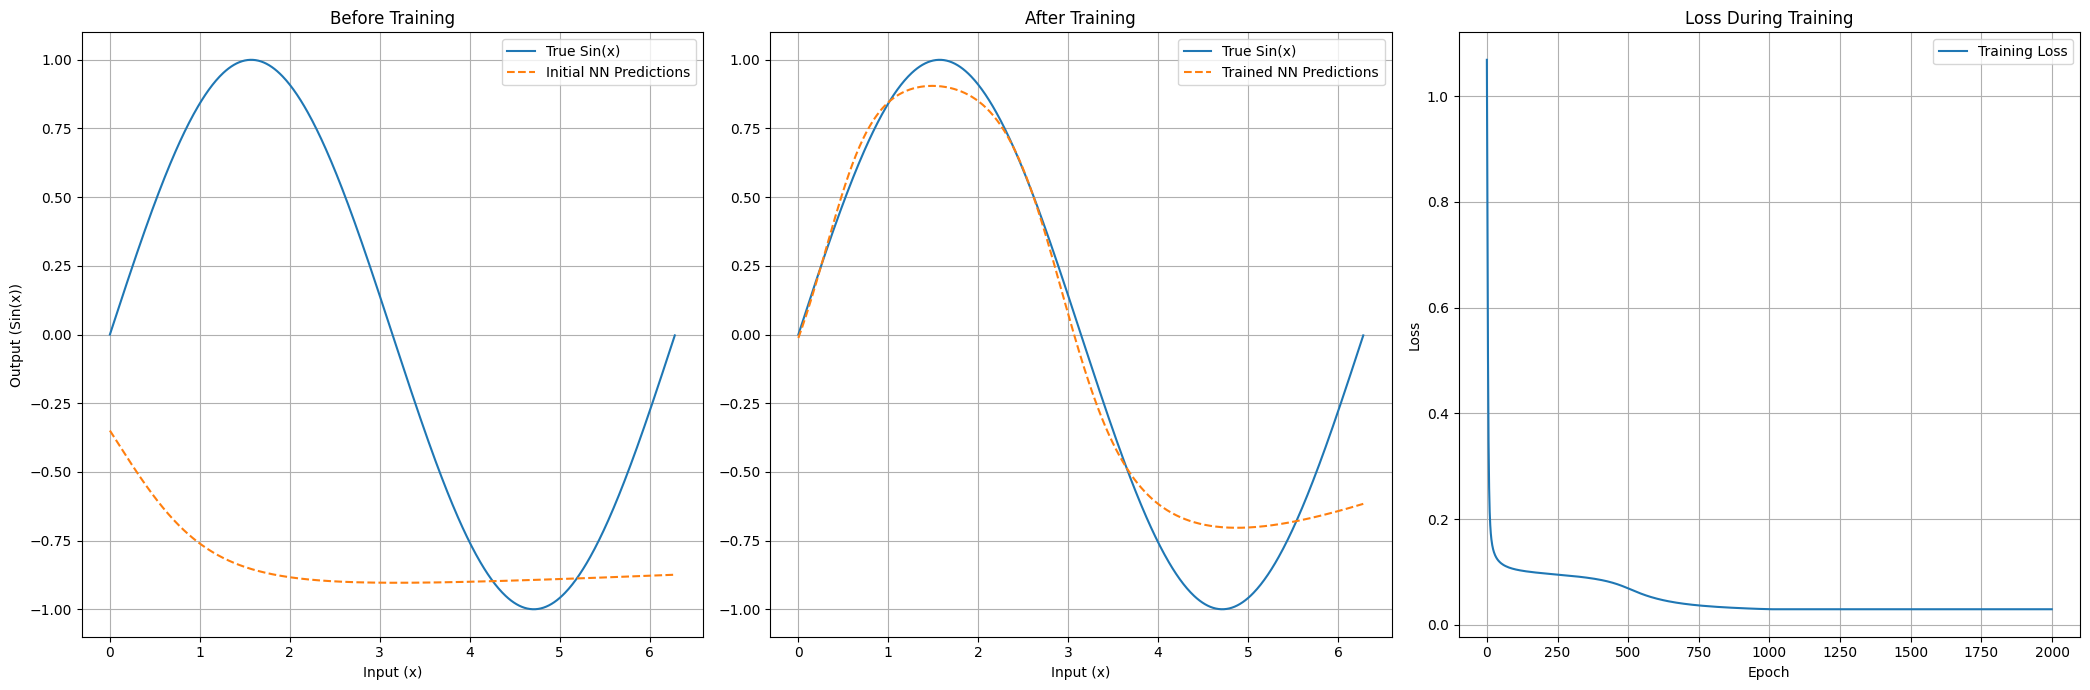

In [31]:
x = np.arange(0, 2 * np.pi, 0.01)
y = np.sin(x)
training_data = [
    (np.array([i]).reshape(1, 1), np.array([j]).reshape(1, 1)) for i, j in zip(x, y)
]

# Initialize the neural network
nn = NeuralNetwork([1, 5, 1])

# Plot predictions before training
initial_predictions = [nn.feedforward(np.array([[i]])) for i in x]
plt.figure(figsize=(21, 7))
plt.subplot(1, 3, 1)
plt.plot(x, y, label="True Sin(x)")
plt.plot(
    x,
    [p[0, 0] for p in initial_predictions],
    label="Initial NN Predictions",
    linestyle="--",
)
plt.title("Before Training")
plt.xlabel("Input (x)")
plt.ylabel("Output (Sin(x))")
plt.legend()
plt.grid(True)

# Train the network and get loss history
loss_history = nn.train(training_data, 2000, 10, 0.05, 0.01)

# Plot predictions after training
trained_predictions = [nn.feedforward(np.array([[i]])) for i in x]
plt.subplot(1, 3, 2)
plt.plot(x, y, label="True Sin(x)")
plt.plot(
    x,
    [p[0, 0] for p in trained_predictions],
    label="Trained NN Predictions",
    linestyle="--",
)
plt.title("After Training")
plt.xlabel("Input (x)")
plt.legend()
plt.grid(True)

# Plot loss history
plt.subplot(1, 3, 3)
plt.plot(loss_history, label="Training Loss")
plt.title("Loss During Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Expected Output

You will know that the implementation is correct when you see the following plot:

![Expected Output](assets/expected.png)